In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D
from matplotlib import rcParams, cycler
import datetime

%matplotlib inline

In [2]:
%cd '/Users/m-rawlyk/Desktop/Verge/Climate/DataProjects'

/Users/m-rawlyk/Desktop/Verge/Climate/DataProjects


In [3]:
df = pd.read_csv("Severn.csv")
df.rename(columns = {'YEAR':'Year', 'PRECTOTCORR':'Precip', 'RH2M':'RelHum', 
                     'T2M_RANGE':'T_range', 'T2MDEW':'T_dew', 'T2M_MIN':'T_min', 'T2M_MAX':'T_max',
                     'T2M':'T_mean', 'WS2M':'WS_mean', 'WS2M_MAX':'WS_max', 'WS2M_MIN':'WS_min',
                     'QV2M':'SpecHum', 'MO':'Month', 'DY':'DoM', 'T2MWET':'T_WetBulb', 'WS10M':'WS_mean',
                     'WS10M_MAX':'WS_max', 'CLRSKY_SFC_SW_DWN':'ClrSky_Insol', 'ALLSKY_KT':'AllSky_Insol',
                     'KT':'Insol_clearness'}, inplace=True)



,Date,Year,Month,DoM,T_mean,T_max,T_min,Precip
0,1991-01-01,1991,1,1,-6.31,-3.50,-9.81,0.05
1,1991-01-02,1991,1,2,-5.43,-2.53,-8.91,0.18
2,1991-01-03,1991,1,3,-7.29,-4.79,-9.87,0.17
3,1991-01-04,1991,1,4,-6.60,-4.63,-8.28,0.42
4,1991-01-05,1991,1,5,-6.27,-4.31,-9.50,1.89
...,...,...,...,...,...,...,...,...
11591,2022-09-26,2022,9,26,12.74,16.15,10.94,12.09
11592,2022-09-27,2022,9,27,12.32,13.15,10.86,33.57
11593,2022-09-28,2022,9,28,11.08,14.40,7.93,0.11
11594,2022-09-29,2022,9,29,10.34,15.18,5.37,0.00


In [4]:
# Meta-data

#proj_name ='Verge Farm'
#df = df.drop(columns=['LAT','LON'])
df = df.replace(-999.00, np.NaN)
#print(df['AllSky_Insol'].isna().sum())
#print(df['ClrSky_Insol'].isna().sum())
df = df.interpolate('linear')
#df['DoY'] = df['Datedatetime.timetuple().tm_yday
df['month_year'] = pd.to_datetime(df['Date']).dt.to_period('M')

In [5]:
df

,Date,Year,Month,DoM,T_mean,T_max,T_min,Precip,month_year
0,1991-01-01,1991,1,1,-6.31,-3.50,-9.81,0.05,1991-01
1,1991-01-02,1991,1,2,-5.43,-2.53,-8.91,0.18,1991-01
2,1991-01-03,1991,1,3,-7.29,-4.79,-9.87,0.17,1991-01
3,1991-01-04,1991,1,4,-6.60,-4.63,-8.28,0.42,1991-01
4,1991-01-05,1991,1,5,-6.27,-4.31,-9.50,1.89,1991-01
...,...,...,...,...,...,...,...,...,...
11591,2022-09-26,2022,9,26,12.74,16.15,10.94,12.09,2022-09
11592,2022-09-27,2022,9,27,12.32,13.15,10.86,33.57,2022-09
11593,2022-09-28,2022,9,28,11.08,14.40,7.93,0.11,2022-09
11594,2022-09-29,2022,9,29,10.34,15.18,5.37,0.00,2022-09


# Get your shit together

In [6]:
mean_vals_by_month = df.groupby('Month').mean()
min_vals_by_month = df.groupby('Month').min()
max_vals_by_month = df.groupby('Month').max()
sum_vals_by_month = df.groupby('Month').sum()

#mean_vals_by_dom = df.groupby('DoM').mean()
#min_vals_by_dom = df.groupby('DoM').min()
#max_vals_by_dom = df.groupby('DoM').max()

In [7]:
sum_vals_by_MonthYear = df.groupby('month_year').sum()
MonthYear_precip = sum_vals_by_MonthYear.Precip
df2 = df

In [8]:
df2 = df2.set_index('month_year')

In [9]:
df2['YM_precip'] = MonthYear_precip
df['YM_precip'] = df2['YM_precip'].values

In [10]:
df

,Date,Year,Month,DoM,T_mean,T_max,T_min,Precip,month_year,YM_precip
0,1991-01-01,1991,1,1,-6.31,-3.50,-9.81,0.05,1991-01,20.93
1,1991-01-02,1991,1,2,-5.43,-2.53,-8.91,0.18,1991-01,20.93
2,1991-01-03,1991,1,3,-7.29,-4.79,-9.87,0.17,1991-01,20.93
3,1991-01-04,1991,1,4,-6.60,-4.63,-8.28,0.42,1991-01,20.93
4,1991-01-05,1991,1,5,-6.27,-4.31,-9.50,1.89,1991-01,20.93
...,...,...,...,...,...,...,...,...,...,...
11591,2022-09-26,2022,9,26,12.74,16.15,10.94,12.09,2022-09,86.38
11592,2022-09-27,2022,9,27,12.32,13.15,10.86,33.57,2022-09,86.38
11593,2022-09-28,2022,9,28,11.08,14.40,7.93,0.11,2022-09,86.38
11594,2022-09-29,2022,9,29,10.34,15.18,5.37,0.00,2022-09,86.38


In [11]:
max_rain_day = df.loc[df['Precip'] == df['Precip'].max()]
extreme_heat_max_temp_day = df.loc[df['T_max'] == df['T_max'].max()]
extreme_cold_min_temp_day = df.loc[df['T_min'] == df['T_min'].min()]
extremes = pd.concat([max_rain_day, extreme_heat_max_temp_day, extreme_cold_min_temp_day])
extremes['Extreme:'] = ('Extreme Precip', 'Extreme Heat', 'Extreme Cold')
extremes.set_index('Extreme:')

,Date,Year,Month,DoM,T_mean,T_max,T_min,Precip,month_year,YM_precip
Extreme:,,,,,,,,,,
Extreme Precip,2022-08-03,2022,8,3,21.72,27.82,14.86,52.65,2022-08,182.29
Extreme Heat,2016-08-11,2016,8,11,27.61,33.98,21.35,0.34,2016-08,31.59
Extreme Cold,2003-03-03,2003,3,3,-22.02,-16.11,-29.79,0.07,2003-03,69.76


In [12]:
min_vals_by_month = df.groupby('Month').min()
max_vals_by_month = df.groupby('Month').max()

In [13]:
month_precip_max = (max_vals_by_month['YM_precip'])
month_precip_min = (min_vals_by_month['YM_precip'])

# Precipitation

In [14]:
mean_monthly_total_precip = sum_vals_by_month.Precip/30
precip_mean = mean_monthly_total_precip
precip_max = (max_vals_by_month['Precip'])
precip_range = pd.concat([precip_mean, precip_max], axis=1)
precip_range.rename(index = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
                             7:'July', 8:'August', 9:'September', 10:'October', 11:'November',
                             12:'December'}, inplace=True)

precip_range.rename(columns = {list(precip_range)[0]:'Mean Precip', list(precip_range)[1]:'Max Precip'}, inplace = True)

In [15]:
precip_df = pd.DataFrame(precip_mean)
precip_df['max'] = month_precip_max
precip_df['min'] = month_precip_min
precip_df['day_max'] = precip_max
precip_df.rename(columns = {list(precip_df)[0]:'mean'}, inplace = True)
precip_df.rename(index = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
                             7:'July', 8:'August', 9:'September', 10:'October', 11:'November',
                             12:'December'}, inplace=True)
precip_df['mean'] = precip_df['mean'].round(decimals=2)
precip_df

,mean,max,min,day_max
Month,,,,
January,44.99,102.50,20.46,26.32
February,37.97,84.28,8.68,23.47
March,45.92,149.71,13.03,22.89
April,57.75,131.98,21.14,29.55
May,64.80,146.52,11.63,37.46
June,65.67,106.21,20.07,34.30
July,61.65,110.63,25.20,39.08
August,62.94,182.29,21.04,52.65
September,63.51,117.76,28.25,33.57


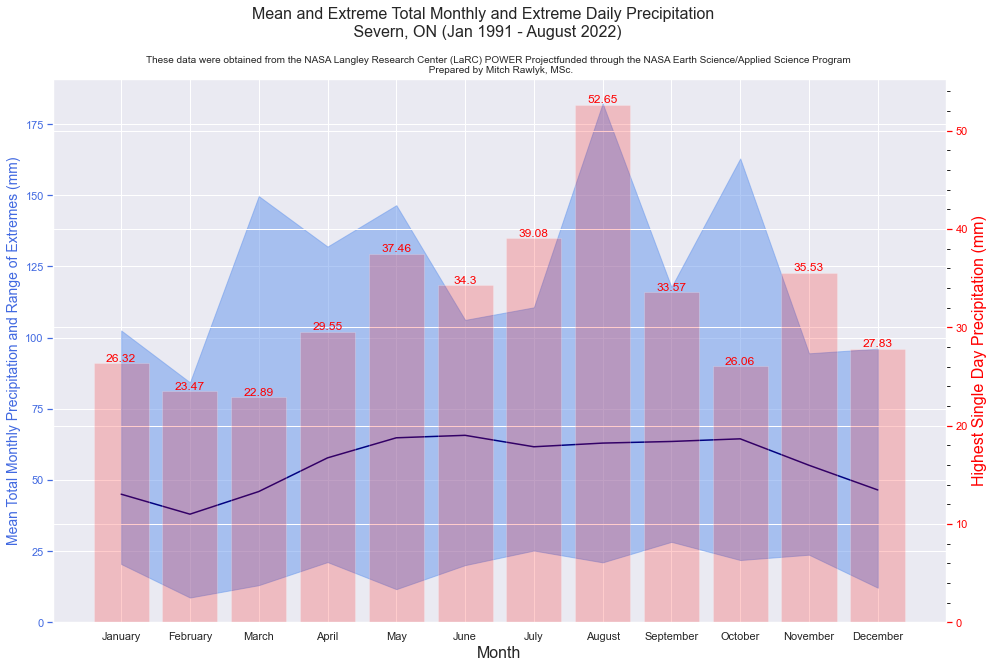

In [20]:
fig = plt.figure(figsize = (16, 10))
ax = plt.subplot(1,1,1)

sns.set(style="darkgrid")

x = precip_df.reset_index()
x = x['Month']

y1 = precip_df['mean']
y2 = precip_df['min']
y3 = precip_df['max']
y4 = precip_max


ax.plot(x, y1, color='navy')
ax.fill_between(x, y2, y3, alpha = .5, color='cornflowerblue')

ax2 = ax.twinx()

y4 = precip_max
single_day = ax2.bar(x, y4, color ='red', alpha=.2)
ax2.bar_label(single_day, color = 'red')

plt.xticks(fontsize=18)
#ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.yaxis.set_major_locator(ticker.MultipleLocator(25))
ax2.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())

ax.set_ylabel('Mean Total Monthly Precipitation and Range of Extremes (mm)', fontsize = 14)
ax.yaxis.label.set_color('royalblue')
ax.tick_params(axis='y', colors='royalblue')

fig.suptitle("Mean and Extreme Total Monthly and Extreme Daily Precipitation \n Severn, ON (Jan 1991 - August 2022)", fontsize=16)
ax.set_title('These data were obtained from the NASA Langley Research Center (LaRC) POWER Projectfunded through the NASA Earth Science/Applied Science Program \n Prepared by Mitch Rawlyk, MSc.', fontsize = 10)
ax2.set_ylabel('Highest Single Day Precipitation (mm)', fontsize=16)
ax.set_xlabel('Month', fontsize=16)
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')

# Temperature

In [17]:
temp_min = (min_vals_by_month['T_min'])
temp_mean = (mean_vals_by_month['T_mean'])
temp_max = (max_vals_by_month['T_max'])
temp_range = pd.concat([temp_min, temp_mean, temp_max], axis=1)
temp_range.rename(index = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
                           7:'July', 8:'August', 9:'September', 10:'October', 11:'November',
                           12:'December'}, inplace=True)
temp_range.rename(columns = {list(temp_range)[0]:'T Min', list(temp_range)[1]:'T Mean',
                             list(temp_range)[2]:'T Max'}, inplace = True)
temp_range

,T Min,T Mean,T Max
Month,,,
January,-26.69,-6.583004,11.15
February,-28.55,-6.317290,11.83
March,-29.79,-1.577077,22.80
April,-13.12,4.665938,23.28
May,-2.93,11.450917,30.75
June,2.80,17.279167,33.53
July,7.19,20.700887,33.83
August,7.69,20.483185,33.98
September,0.61,16.451750,33.05


Text(0.5, 0, 'Month')

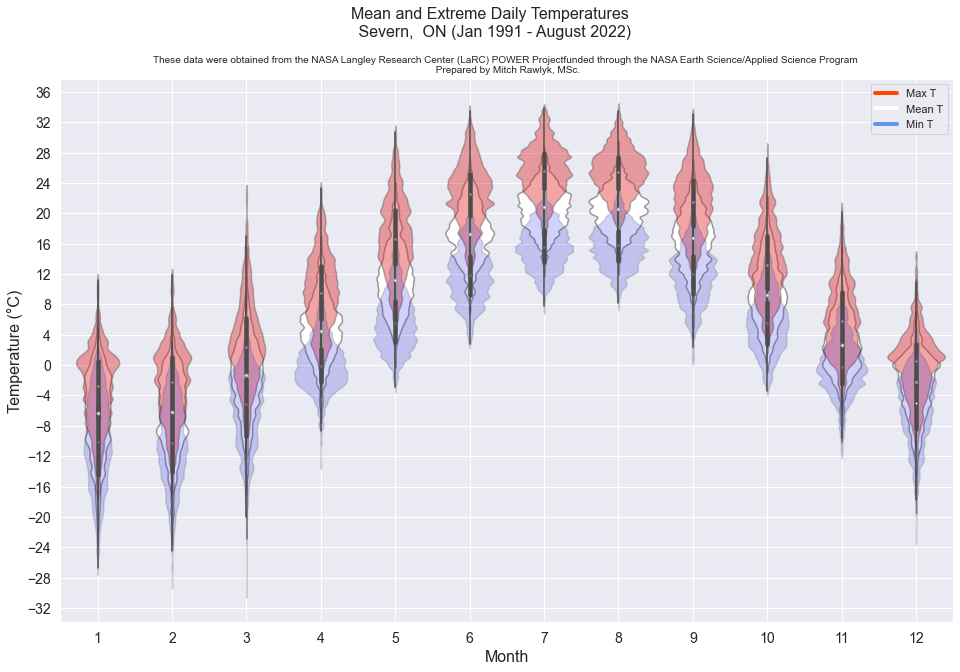

In [18]:
fig = plt.figure(figsize=(16, 10))
ax = plt.subplot(1, 1, 1)




#Temperature:
sns.set(style="darkgrid")
mean_violin = sns.violinplot(x='Month', y='T_mean', data=df, color='white', split=True, bw=0.08)
min_violin = sns.violinplot(x='Month', y='T_max', data=df, dodge='True', color='red', split=True, bw=0.08)
max_violin = sns.violinplot(x='Month', y='T_min', data=df, color='blue', split=True, bw=0.08)

for violin, alpha in zip(ax.collections[0:-1], [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                                                .4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,
                                                .4,.4,.4,.4,.4,.4,.4,.4,.4,
                                                .2,.2,.2,.2,.2,.2,.2,.2,.2,.2,.2,.2,.2,.2,.2,.2,
                                                .2,.2,.2,.2,.2,.2,.2,.2,.2]):


    violin.set_alpha(alpha)


fig.suptitle("Mean and Extreme Daily Temperatures \n Severn,  ON (Jan 1991 - August 2022)", fontsize=16)
ax.set_title('These data were obtained from the NASA Langley Research Center (LaRC) POWER Projectfunded through the NASA Earth Science/Applied Science Program \n Prepared by Mitch Rawlyk, MSc.', fontsize = 10)
ax.set_ylabel('Temperature (°C)', fontsize = 16)


custom_lines = [Line2D([0], [0], color='orangered', lw=4),
                Line2D([0], [0], color='white', lw=4),
                Line2D([0], [0], color='cornflowerblue', lw=4)]

ax.legend(custom_lines, ['Max T', 'Mean T', 'Min T'], loc = 'upper right')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.yaxis.set_major_locator(ticker.MultipleLocator(4))
ax.set_xlabel('Month', fontsize=16)